<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **Regressão Linear**

Exercícios usando a base de dados **CarPrice_Assignment**

A base de dados "CarPrice_Assignment" é um conjunto de dados que contém informações sobre várias características de carros, como preço, tamanho do motor, consumo de combustível, potência, entre outros. Cada linha da base de dados corresponde a um carro, e as colunas representam diferentes atributos ou características desse carro. Isso permite a exploração de como diferentes características estão relacionadas ao preço do carro e como um modelo de regressão pode ser construído para prever o preço com base nessas características.

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [126]:
df=pd.read_csv("https://raw.githubusercontent.com/gustavogrds/TIC/master/data/CarPrice.csv")
df.head()

,car_ID,CarName,fueltype,horsepower,enginesize,doornumber,citympg,highwaympg,carbody,price
0,1,alfa-romero giulia,gas,111,130,two,21,27,convertible,13495.0
1,2,alfa-romero stelvio,gas,111,130,two,21,27,convertible,16500.0
2,3,alfa-romero Quadrifoglio,gas,154,152,two,19,26,hatchback,16500.0
3,4,audi 100 ls,gas,102,109,four,24,30,sedan,13950.0
4,5,audi 100ls,gas,115,136,four,18,22,sedan,17450.0


In [127]:
print(f"shape dataframe: rows = {df.shape[0]} and columns = {df.shape[1]}")

shape dataframe: rows = 205 and columns = 10


### **Questão 1.**
Na base de dados,
- Quantos tipos de combustível `fueltype` diferentes há?
- Quantos veículos há em cada tipo?
- Determinar o preço médio dos veículos segundo o tipo de combustível que usa?

In [128]:
# Seu código

# What are the fueltype we have?
nfueltype = df['fueltype'].value_counts().count()
print(f'Answer: we have {nfueltype} of fueltype')

Answer: we have 2 of fueltype


In [129]:
#df['fueltype'].value_counts(normalize=True).map('{:.2%}'.format)

# Counting for each fueltype
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [130]:
data_vehicle_diesel = df[df.fueltype == 'diesel']
average_price_diesel = data_vehicle_diesel['price'].mean()

print(f'Average price for the vehicle diesel = {average_price_diesel}')

Average price for the vehicle diesel = 15838.15


In [131]:
data_vehicle_gas = df[df.fueltype == 'gas']
average_price_gas = round(data_vehicle_gas['price'].mean(), 2)

print(f'Average price for the vehicle gas = {average_price_gas}')

Average price for the vehicle gas = 12999.8


### **Questão 2.**

- Determinar o preço mínimo, máximo, médio, mediano, Q1 e Q3 dos veículos considerados na base de dados
- Quais são as características do veículo mais caro? E o mais barato?

Dica: Q1: Ele representa o ponto abaixo do qual 25% dos dados estão localizados.


In [132]:
df.describe().loc[['min']]

,car_ID,horsepower,enginesize,citympg,highwaympg,price
min,1.0,48.0,61.0,13.0,16.0,5118.0


In [133]:
df.describe().loc[['max']]

,car_ID,horsepower,enginesize,citympg,highwaympg,price
max,205.0,288.0,326.0,49.0,54.0,45400.0


In [134]:
df.describe().loc[['mean']]

,car_ID,horsepower,enginesize,citympg,highwaympg,price
mean,103.0,104.117073,126.907317,25.219512,30.75122,13276.710571


In [135]:
df.describe().loc[['25%']]

,car_ID,horsepower,enginesize,citympg,highwaympg,price
25%,52.0,70.0,97.0,19.0,25.0,7788.0


In [136]:
df.describe().loc[['75%']]

,car_ID,horsepower,enginesize,citympg,highwaympg,price
75%,154.0,116.0,141.0,30.0,34.0,16503.0


In [137]:
df.describe()

,car_ID,horsepower,enginesize,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,104.117073,126.907317,25.219512,30.751220,13276.710571
std,59.322565,39.544167,41.642693,6.542142,6.886443,7988.852332
min,1.000000,48.000000,61.000000,13.000000,16.000000,5118.000000
25%,52.000000,70.000000,97.000000,19.000000,25.000000,7788.000000
50%,103.000000,95.000000,120.000000,24.000000,30.000000,10295.000000
75%,154.000000,116.000000,141.000000,30.000000,34.000000,16503.000000
max,205.000000,288.000000,326.000000,49.000000,54.000000,45400.000000


### **Questão 3**
Estude as distribuições das variáveis `horsepower` e `enginesize` por meio de um boxplot. Há outliers?

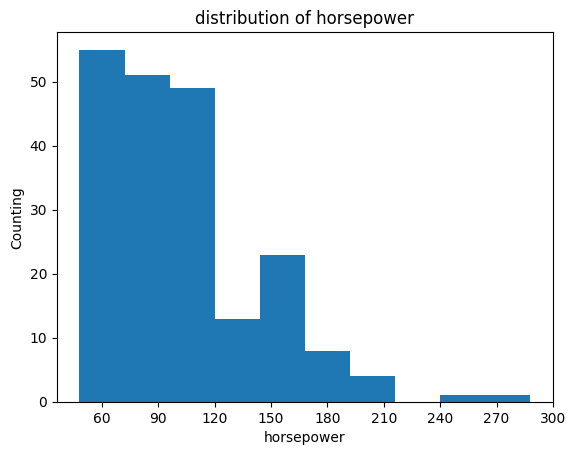

In [138]:
ax = plt.figure().gca()
plt.hist( df['horsepower'], bins=10) # plot ANO BO
plt.title("distribution of horsepower")
plt.ylabel("Counting")
plt.xlabel("horsepower")
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # set int number x label
plt.show()

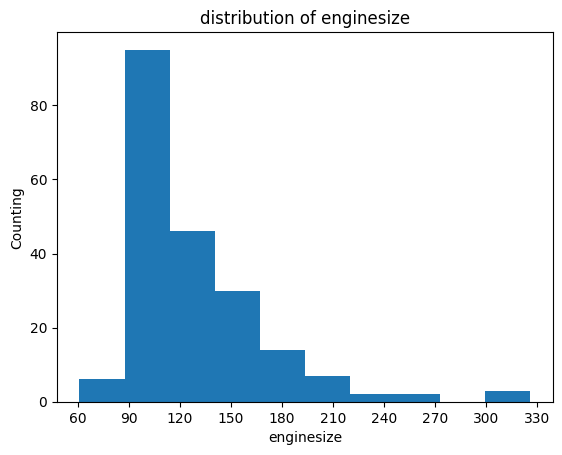

In [152]:
ax = plt.figure().gca()
plt.hist( df['enginesize'], bins=10) # plot ANO BO
plt.title("distribution of enginesize")
plt.ylabel("Counting")
plt.xlabel("enginesize")
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # set int number x label
plt.show()

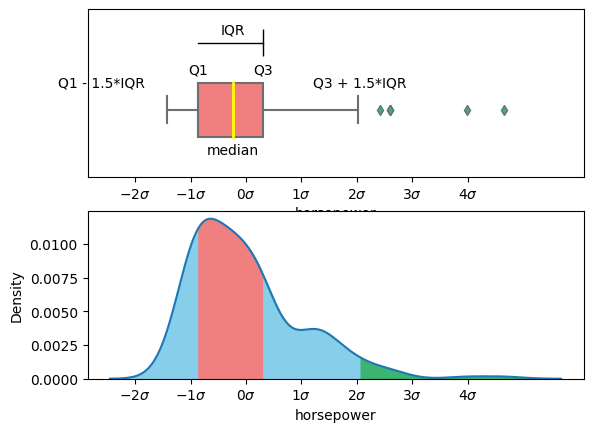

In [151]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
medianprops = dict(linestyle='-', linewidth=2, color='yellow')
sns.boxplot(x=df['horsepower'], color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

mean = df['horsepower'].mean()
std = df['horsepower'].std()
q1, median, q3 = np.percentile(df.horsepower, [25, 50, 75])
iqr = q3 - q1

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_yticks([])
ax1.tick_params(labelbottom=True)
ax1.set_ylim(-1, 1.5)
ax1.errorbar([q1, q3], [1, 1], yerr=[0, 0.2], color='black', lw=1)
ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
# ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

sns.kdeplot(df.horsepower, ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])
plt.show()

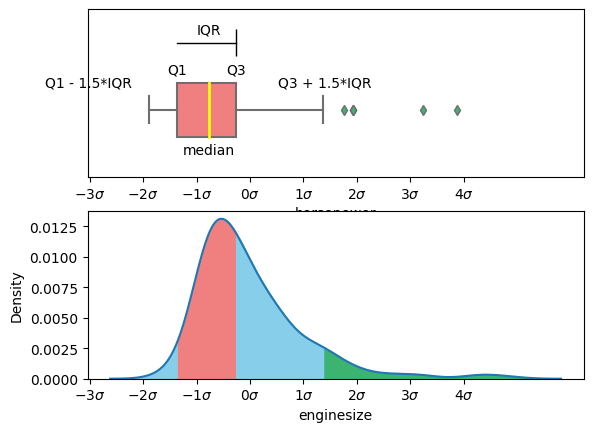

In [153]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
medianprops = dict(linestyle='-', linewidth=2, color='yellow')
sns.boxplot(x=df['horsepower'], color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

mean = df['enginesize'].mean()
std = df['enginesize'].std()
q1, median, q3 = np.percentile(df.horsepower, [25, 50, 75])
iqr = q3 - q1

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_yticks([])
ax1.tick_params(labelbottom=True)
ax1.set_ylim(-1, 1.5)
ax1.errorbar([q1, q3], [1, 1], yerr=[0, 0.2], color='black', lw=1)
ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
# ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

sns.kdeplot(df.enginesize, ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])
plt.show()

### **Questão 4**
Determinar o coeficiente de correlação da variável `price` com as demais variáveis numéricas. Com qual variável está linealmente relacionada de forma negativa?

In [140]:
# Seu código


### **Questão 5**
Usando um gráfico de *Scatterplot* avalie a relação linear entre o preço `price` e as variáveis númericas. Qual ou quais variáveis não se relacionam de forma linear com o preço?

### **Questão 6**

Faça um scaterplot em que relacione as variáveis `price` e `horsepower`. Nesse gráfico, use cores para representar os veículos segundo o tipo de combustivel `fueltype` que usa.

Dica: Use a biblioteca *Seaborn* para gerar o gráfico.

### **Questão 7**

Ajustar um modelo de regressão simples para prever o preço `price` de um veículo usando como variável explicativa cavalo-vapor `horsepower` (potência utilizada para descrever a potência de motores e máquinas).

- A variável `horsepower` é significativa ao nível de 0.05?
- Qual o valor de R-squared?
- Plote os preços em funçao da potência e gráfico no mesmo gráfico a reta ajustada.
- Usando essa reta, qual é o preço esperado para veículos com potência 134? Construa um Intervalo de confiança de 95% para esta previsão.

In [141]:
# Seu código


### **Questão 8**

- Calcule os resíduos do modelo ajustado acima usando `model.resid_pearson`. Qual a média?
- Faça um gráfico dos resíduos. Aparentemente, os dados seguem uma distribuição Normal?

In [142]:
# Seu código


### **Questão 9**

Crie uma nova variável `fueleconomy` definida como:

$$0.55 \times citympg + 0.45 \times highwaympg $$

Ajustar um modelo de regressão simples para prever o preço price de um veículo usando como variável explicativa `fueleconomy`. Qual modelo de regressão apresenta maior R-square aquele que usa a variável `horsepower` ou `fueleconomy`?

In [143]:
# Seu código


### **Questão 10**

Ajustar um modelo de regressão multipla para prever o preço `price` de um veículo usando como variáveis explicativas:  `horsepower`, `enginesize` ,`doornumber` e `fueleconomy`.

- Qual variável (ou variáveis) não são significativas ao nível de 0.05?
- Qual o valor de R-squared?
- Usando essa reta, qual é o preço esperado para veículos de duas portas, com horsepower de 134, enginesize de 120 e fueleconomy de 20.21 ?

In [144]:
# Seu código


### **Questão 11**

- Calcule os resíduos do modelo ajustado acima. Qual a média?
- Faça um histograma dos resíduos. Aparentemente, os dados seguem uma distribuição Normal?

In [145]:
# Seu código


### **Questão 12**

Você deve ter reparado que no summary(model) uma mensagem de alerta de *multicollinearity* isto acontece quando  quando duas ou mais variáveis independentes (ou variáveis explicativas) estão altamente relacionadas linearmente, o que pode dificultar a separação de seus efeitos individuais sobre a variável dependente.

- Determine a correlação linear entre as variáveis `horsepower`, `enginesize` e `fueleconomy`. Comente!

In [146]:
# Seu código


### **Questão 13**.

Ajuste um modelo de regressão multipla para prever o preço price de um veículo usando como variáveis explicativas:
`carbody` e `citympg`.

Use como categoria de referência `sedan` para a variável `carbody`. Para isso escrever assim:

```
formula='price ~C(carbody, Treatment("sedan"))+citympg'
```


- Qual variável (ou variáveis) não são significativas ao nível de 0.05?
- Qual o valor de R-squared?
- Usando essa reta, qual é o preço esperado para veículos sedan com citympg de  23.12? Construa um Intervalo de confiança de 95% para esta previsão.

In [147]:
# Seu código

